In [1]:
import pandas as pd
import numpy as np

# 从 numpy 数组中删除科学记数法
#安装 nsepy 库以获取股票价格

############################################
# 使用 nsepy 库获取 Stock 数据
from nsepy import get_history
from datetime import datetime

startDate=datetime(2013, 2,10)
endDate=datetime(2023, 2, 10)

# 获取数据
symbol = "INFY"
data=get_history(symbol=symbol, start=startDate, end=endDate)
print(data.shape)
data.head()

(2476, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-02-11,INFY,EQ,2789.45,2801.25,2814.95,2784.90,2790.50,2792.05,2794.71,924349,2.583290e+14,39415,750516,0.8119
2013-02-12,INFY,EQ,2792.05,2770.00,2774.10,2741.75,2756.55,2755.25,2753.70,555299,1.529130e+14,45045,379010,0.6825
2013-02-13,INFY,EQ,2755.25,2757.00,2797.15,2745.00,2783.00,2789.55,2782.38,790361,2.199086e+14,38695,509982,0.6453
2013-02-14,INFY,EQ,2789.55,2794.40,2828.00,2794.35,2810.00,2812.75,2815.77,861750,2.426491e+14,54690,590742,0.6855
2013-02-15,INFY,EQ,2812.75,2790.00,2808.50,2776.30,2779.30,2788.60,2791.60,649282,1.812538e+14,46586,505981,0.7793


In [18]:
import pymysql
from nsepy import get_history
from datetime import datetime

# Define the database connection parameters
host = 'localhost'
user = 'root'
password = '1234'
database = 'stock_data_db'

# Define the stock data retrieval parameters
symbol = 'INFY'
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 2, 10)

# Connect to the database
conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# Define the SQL query to create the table
create_table_query = """CREATE TABLE IF NOT EXISTS stock_data_basic (
                        Symbol varchar(10),
                        Series varchar(10),
                        Date date,
                        Prev_Close float(15,2),
                        Open float(15,2),
                        High float(15,2),
                        Low float(15,2),
                        Last float(15,2),
                        Close float(15,2),
                        VWAP float(15,2),
                        Volume int(15),
                        Turnover float(20,2),
                        Trades int(15),
                        Deliverable_Volume int(15),
                        Percent_Deliverable float(15,2)
                        )"""

# Execute the SQL query to create the table
cursor.execute(create_table_query)

# Commit the changes to the database
conn.commit()

# Retrieve the stock data
data = get_history(symbol=symbol, start=start_date, end=end_date)

# Insert the stock data into the table
for index, row in data.iterrows():
    insert_query = f"""INSERT INTO stock_data_basic (Symbol, Series, Date, Prev_Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable_Volume, Percent_Deliverable)
                        VALUES ('{symbol}', '{row['Series']}', '{index}', {row['Prev Close']}, {row['Open']}, {row['High']}, {row['Low']}, {row['Last']}, {row['Close']}, {row['VWAP']}, {row['Volume']}, {row['Turnover']}, {row['Trades']}, {row['Deliverable Volume']}, {row['%Deliverble']})"""
    cursor.execute(insert_query)

# Commit the changes to the database
conn.commit()
conn.close()
# Close the database connection

In [2]:
import pymysql
from nsepy import get_history
from datetime import datetime
import talib

# Define the database connection parameters
host = 'localhost'
user = 'root'
password = '1234'
database = 'stock_data_db'

# Define the stock data retrieval parameters
symbol = 'INFY'
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 2, 10)

In [3]:
# Define the discrete values for the indicators
short_term_interest_rate_discrete = {'low': 0.0, 'medium': 0.5, 'high': 1.0}
put_call_ratio_discrete = {'low': 0.0, 'medium': 0.5, 'high': 1.0}
volatility_index_discrete = {'low': 0.0, 'medium': 0.5, 'high': 1.0}
rsi_discrete = {'oversold': 0.0, 'neutral': 0.5, 'overbought': 1.0}
stoch_discrete = {'oversold': 0.0, 'neutral': 0.5, 'overbought': 1.0}
macd_discrete = {'bearish': 0.0, 'neutral': 0.5, 'bullish': 1.0}
ma_discrete = {'below': 0.0, 'neutral': 0.5, 'above': 1.0}
bb_discrete = {'below_lower': 0.0, 'within_bands': 0.5, 'above_upper': 1.0}
obv_discrete = {'bearish': 0.0, 'neutral': 0.5, 'bullish': 1.0}
#cmf_discrete = {'bearish': 0.0, 'neutral': 0.5, 'bullish': 1.0}

# Connect to the database
conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# Define the SQL query to create the table
create_table_query = """CREATE TABLE IF NOT EXISTS stock_data_indicators (
                        Symbol varchar(10),
                        Series varchar(10),
                        Date date,
                        Prev_Close float(15,2),
                        Open float(15,2),
                        High float(15,2),
                        Low float(15,2),
                        Last float(15,2),
                        Close float(15,2),
                        VWAP float(15,2),
                        Volume int(15),
                        Turnover float(20,2),
                        Trades int(15),
                        Deliverable_Volume int(15),
                        Percent_Deliverable float(15,2),
                        STIR_discrete float(3,2),
                        PCR_discrete float(3,2),
                        VI_discrete float(3,2),
                        RSI_discrete float(3,2),
                        STOCH_discrete float(3,2),
                        MACD_discrete float(3,2),
                        MA_discrete float(3,2),
                        BB_discrete float(3,2),
                        OBV_discrete float(3,2),
                        CMF_discrete float(3,2),
                        Decision varchar(10),
                        CDL2CROWS INT, CDL3BLACKCROWS INT, CDL3INSIDE INT, CDL3LINESTRIKE INT, CDL3OUTSIDE INT, CDL3STARSINSOUTH INT, CDL3WHITESOLDIERS INT, CDLABANDONEDBABY INT, CDLADVANCEBLOCK INT, CDLBELTHOLD INT, CDLBREAKAWAY INT, CDLCLOSINGMARUBOZU INT, CDLCONCEALBABYSWALL INT, CDLCOUNTERATTACK INT, CDLDARKCLOUDCOVER INT, CDLDOJI INT, CDLDOJISTAR INT, CDLDRAGONFLYDOJI INT
                        )"""

# Execute the SQL query to create the table
cursor.execute(create_table_query)

# Commit the changes to the database
conn.commit()
conn.close()
# Retrieve the stock data

### Build All indicators Dataframe

In [10]:
import pymysql
from nsepy import get_history
from datetime import datetime
import talib

import pandas as pd
import numpy as np


# Define the database connection parameters
host = 'localhost'
user = 'root'
password = '1234'
database = 'stock_data_db'

# Define the stock data retrieval parameters
symbol = 'INFY'
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 2, 10)


In [11]:
data = get_history(symbol=symbol, start=start_date, end=end_date)

In [12]:
# Calculate in
# dicators using talib
data['STIR'] = talib.RSI(data['Close'], timeperiod=14)

In [13]:
data['PCR'] = data['Volume'].rolling(window=10).sum() / data['Volume'].rolling(window=10).mean()

In [14]:
data['VI'] = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=14)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['slowk'], data['slowd'] = talib.STOCH(data['High'], data['Low'], data['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
data['MACD'], data['MACDsignal'], data['MACDhist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MA5'] = talib.MA(data['Close'], timeperiod=5)
data['MA10'] = talib.MA(data['Close'], timeperiod=10)
data['MA20'] = talib.MA(data['Close'], timeperiod=20)
data['MA50'] = talib.MA(data['Close'], timeperiod=50)
data['MA200'] = talib.MA(data['Close'], timeperiod=200)
upperband, middleband, lowerband = talib.BBANDS(data['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
data['BB'] = (data['Close'] - lowerband) / (upperband - lowerband)
data['OBV'] = talib.OBV(data['Close'], data['Volume'])

In [15]:
# data['CMF'] = talib.CMF(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=20)
# Calculate Chaikin A/D Oscillator
data['ADOSC'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], fastperiod=3, slowperiod=10)

In [16]:
# Discretize the indicator values
data['STIR_discrete'] = pd.cut(data['STIR'], bins=[0, 30, 70, 100], labels=['low', 'medium', 'high'])
data['PCR_discrete'] = pd.cut(data['PCR'], bins=[0, 0.8, 1.2, 100], labels=['low', 'medium', 'high'])
data['VI_discrete'] = pd.cut(data['VI'], bins=[0, 10, 20, 1000], labels=['low', 'medium', 'high'])
data['RSI_discrete'] = pd.cut(data['RSI'], bins=[0, 30, 70, 100], labels=['oversold', 'neutral', 'overbought'])
data['STOCH_discrete'] = pd.cut(data['slowd'], bins=[0, 20, 80, 100], labels=['oversold', 'neutral', 'overbought'])
data['MACD_discrete'] = pd.cut(data['MACDhist'], bins=[-1000, 0, 1000], labels=['bearish', 'bullish'])
# Define the discrete values for the CMF indicator
cmf_discrete = {'bearish': 0.0, 'neutral': 0.5, 'bullish': 1.0}

# Apply the discrete values to the CMF indicator
data['CMF_discrete'] = data['ADOSC'].apply(lambda x: cmf_discrete['bearish'] if x < 0 else cmf_discrete['bullish'] if x > 0 else cmf_discrete['neutral'])

In [17]:
# Calculate moving average (MA)
data['MA'] = talib.SMA(data['Close'], timeperiod=20)

# Calculate upper and lower Bollinger Bands (BB)
data['upper'], data['middle'], data['lower'] = talib.BBANDS(data['Close'], timeperiod=20)

# Calculate On-Balance Volume (OBV)
data['OBV'] = talib.OBV(data['Close'], data['Volume'])

# Define the function to discretize the indicators
def discretize(value, thresholds):
    if value < thresholds['low']:
        return 0.0
    elif value < thresholds['high']:
        return 0.5
    else:
        return 1.0

# Discretize the indicators
data['MA_discrete'] = data['Close'].rolling(window=20).apply(lambda x: discretize(x[-1], {'low': data['MA'].min(), 'high': data['MA'].max()}))
data['BB_discrete'] = data['Close'].rolling(window=20).apply(lambda x: discretize(x[-1], {'low': data['lower'].min(), 'high': data['upper'].max()}))
data['OBV_discrete'] = data['OBV'].rolling(window=20).apply(lambda x: discretize(x[-1], {'low': data['OBV'].min(), 'high': data['OBV'].max()}))

In [18]:
data['CDL2CROWS'] = talib.CDL2CROWS(data['Open'], data['High'], data['Low'], data['Close'])
data['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(data['Open'], data['High'], data['Low'], data['Close'])
data['CDL3INSIDE'] = talib.CDL3INSIDE(data['Open'], data['High'], data['Low'], data['Close'])
data['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(data['Open'], data['High'], data['Low'], data['Close'])
data['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(data['Open'], data['High'], data['Low'], data['Close'])
data['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(data['Open'], data['High'], data['Low'], data['Close'])
data['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLBELTHOLD'] = talib.CDLBELTHOLD(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLDOJI'] = talib.CDLDOJI(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLDOJISTAR'] = talib.CDLDOJISTAR(data['Open'], data['High'], data['Low'], data['Close'])
data['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(data['Open'], data['High'], data['Low'], data['Close'])

In [19]:
data = data.reset_index(drop=False)

In [20]:
data.columns = data.columns.str.replace(' ', '_') # replace blank spaces with underscores

In [21]:
data.columns = data.columns.str.replace('%', 'Percent_')

In [22]:
specific_date = datetime(2019,1,1).date() # example date

In [23]:
mount_price = data[data['Date'] == specific_date]['Close'][0]

In [24]:
data['Decision'] = data.apply(lambda x: 'Sell' if x['Close'] > mount_price
                                      else ('Buy' if x['Close'] < mount_price
                                            else 'Hold'), axis=1)

### Import to MySQL

In [249]:
import pandas as pd
import pymysql

# create connection to MySQL server
conn = pymysql.connect(host="localhost", user="root", password="1234", database="stock_data_db")

data['Date'] = pd.to_datetime(data['Date'])

# get column names and data types
cols = data.columns
types = data.dtypes

# map pandas data types to MySQL data types
sql_types = []
for t in types:
    if t == "object":
        sql_types.append("varchar(255)")
    elif t == "int64" or t == "int32":
        sql_types.append("int(128)")
    elif t == "float64":
        sql_types.append("float(128,30)")
    elif t == "datetime64[ns]":
        sql_types.append("date")
    elif t.name == "category":
        sql_types.append("varchar(255)")

In [251]:
# create SQL statement to create table
table_name = "stock_data_test"
sql_cols = []
for i in range(len(cols)):
    sql_cols.append(f"{cols[i]} {sql_types[i]}")
sql_cols_str = ",".join(sql_cols)

In [252]:
sql = f"CREATE TABLE IF NOT EXISTS {table_name} ({sql_cols_str}, PRIMARY KEY ({cols[0]}))"

In [254]:
# execute SQL statement to create table
cur = conn.cursor()
cur.execute(sql)

0

In [255]:
columns = []
for col in data.columns:
    col_name = col.strip()
    columns.append(f'{col_name}')
f'({", ".join(columns)})'

# Insert data into MySQL table
for index, row in data.iterrows():
    values = []
    for value, col_type in zip(row, data.dtypes):
        if str(value) == 'nan':
            values.append('NULL')
        else:
            if col_type.name == 'category':
                #values.append(str(value))
                values.append('\''+str(value)+'\'')
            elif col_type == 'datetime64[ns]':
                values.append('\''+value.strftime('%Y-%m-%d')+'\'')
            elif col_type == 'object':
                values.append('\''+str(value)+'\'')
            else:
                #values.append(value)
                values.append('\''+str(value)+'\'')
    values_str = ', '.join([str(x) for x in values])
    sql = f"""INSERT INTO {table_name} ({", ".join(columns)}) VALUES ({values_str})"""
    with conn.cursor() as cursor:
        cursor.execute(sql)

INSERT INTO stock_data_test (Date, Symbol, Series, Prev_Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable_Volume, Percent_Deliverble, STIR, PCR, VI, RSI, slowk, slowd, MACD, MACDsignal, MACDhist, MA5, MA10, MA20, MA50, MA200, BB, OBV, ADOSC, STIR_discrete, PCR_discrete, VI_discrete, RSI_discrete, STOCH_discrete, MACD_discrete, CMF_discrete, MA, upper, middle, lower, MA_discrete, BB_discrete, OBV_discrete, CDL2CROWS, CDL3BLACKCROWS, CDL3INSIDE, CDL3LINESTRIKE, CDL3OUTSIDE, CDL3STARSINSOUTH, CDL3WHITESOLDIERS, CDLABANDONEDBABY, CDLADVANCEBLOCK, CDLBELTHOLD, CDLBREAKAWAY, CDLCLOSINGMARUBOZU, CDLCONCEALBABYSWALL, CDLCOUNTERATTACK, CDLDARKCLOUDCOVER, CDLDOJI, CDLDOJISTAR, CDLDRAGONFLYDOJI, Decision) VALUES ('2019-01-01', 'INFY', 'EQ', '658.95', '660.95', '666.3', '654.15', '665.95', '665.05', '660.66', '2943390', '194457942255000.0', '45422', '1282161', '0.43560000000000004', NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, NULL, N

In [256]:
conn.commit()

In [257]:
conn.close()

In [1]:
data

NameError: name 'data' is not defined

### Plot

In [25]:
data

,Date,Symbol,Series,Prev_Close,Open,High,Low,Last,Close,VWAP,...,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,Decision
0,2019-01-01,INFY,EQ,658.95,660.95,666.30,654.15,665.95,665.05,660.66,...,0,0,0,0,0,0,0,0,0,Hold
1,2019-01-02,INFY,EQ,665.05,666.00,674.00,662.05,668.00,669.05,669.97,...,0,0,0,0,0,0,0,0,0,Sell
2,2019-01-03,INFY,EQ,669.05,672.00,677.00,663.10,668.00,669.15,669.66,...,0,0,0,0,0,0,0,0,0,Sell
3,2019-01-04,INFY,EQ,669.15,671.75,673.90,651.00,660.25,661.05,660.17,...,0,0,0,0,0,0,0,0,0,Buy
4,2019-01-07,INFY,EQ,661.05,665.00,673.60,661.50,671.70,671.70,667.51,...,0,0,0,0,0,0,0,0,0,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,2023-02-06,INFY,EQ,1599.40,1598.00,1598.00,1561.60,1565.00,1569.85,1570.72,...,-100,0,0,0,0,0,0,0,0,Sell
1018,2023-02-07,INFY,EQ,1569.85,1569.00,1576.05,1555.10,1563.10,1562.40,1567.15,...,0,0,0,0,0,0,0,0,0,Sell
1019,2023-02-08,INFY,EQ,1562.40,1565.50,1603.00,1565.50,1590.00,1590.50,1594.11,...,100,0,0,0,0,0,0,0,0,Sell
1020,2023-02-09,INFY,EQ,1590.50,1596.20,1619.75,1586.05,1617.00,1617.00,1605.30,...,0,0,100,0,0,0,0,0,0,Sell


TypeError: float() argument must be a string or a number, not 'datetime.date'

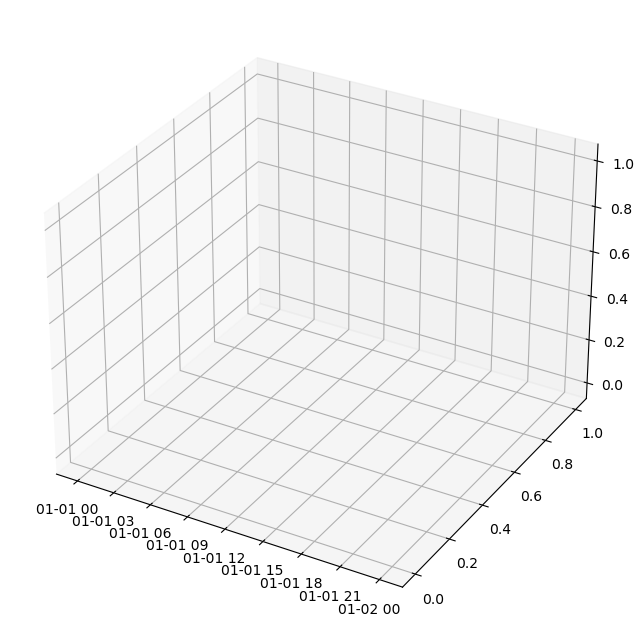

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Date'], data['Close'], data['MA5'], c='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_zlabel('MA5')

plt.show()

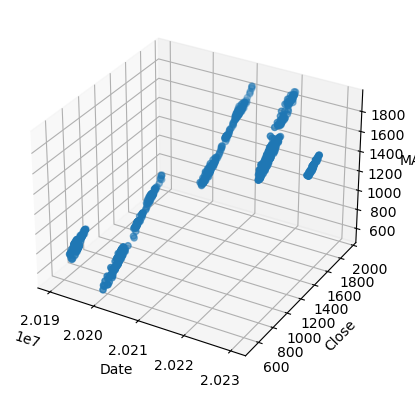

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data['Date'].apply(lambda x: x.strftime('%Y%m%d')).astype(float)
y = data['Close']
z = data['MA5']

ax.scatter(x, y, z)

ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_zlabel('MA5')

plt.show()